In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
# Load the dataset
data = pd.read_csv(r'C:\Users\pc\Downloads\Attrition data.csv')

In [3]:
# Data Cleaning
data.dropna(inplace=True)

        EmployeeID          Age  DistanceFromHome    Education  EmployeeCount  \
count  4300.000000  4300.000000       4300.000000  4300.000000         4300.0   
mean   2211.695116    36.926977          9.197907     2.913256            1.0   
std    1272.117692     9.146517          8.097059     1.024774            0.0   
min       1.000000    18.000000          1.000000     1.000000            1.0   
25%    1110.750000    30.000000          2.000000     2.000000            1.0   
50%    2215.500000    36.000000          7.000000     3.000000            1.0   
75%    3314.250000    43.000000         14.000000     4.000000            1.0   
max    4409.000000    60.000000         29.000000     5.000000            1.0   

          JobLevel  MonthlyIncome  NumCompaniesWorked  PercentSalaryHike  \
count  4300.000000    4300.000000         4300.000000        4300.000000   
mean      2.066977   65059.844186            2.690000          15.210698   
std       1.106633   47045.398914         

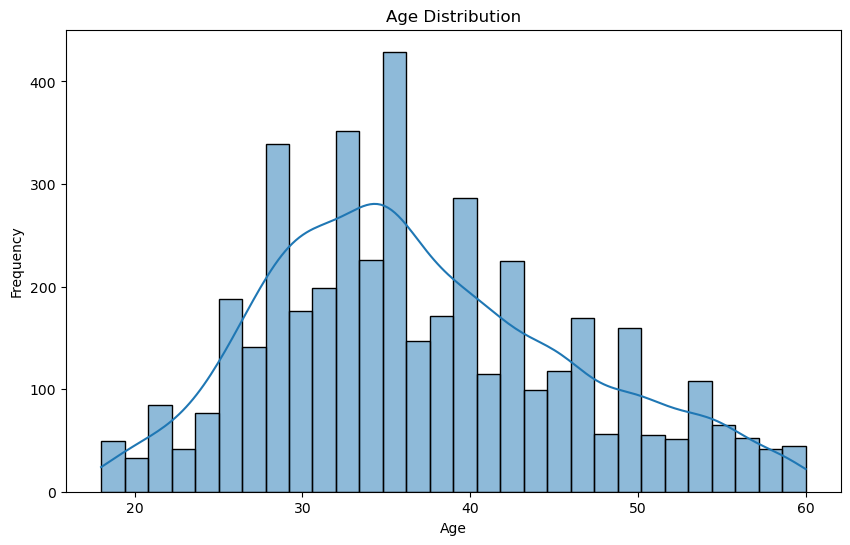

In [4]:
# Exploratory Data Analysis
# Descriptive statistics
print(data.describe())

# Distribution of age
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [5]:
# Attrition rate over time
attrition_rate = data['Attrition'].value_counts(normalize=True) * 100
print(f'Attrition Rate: {attrition_rate}')


Attrition Rate: No     83.837209
Yes    16.162791
Name: Attrition, dtype: float64


C:\Users\pc\AppData\Local\Temp\ipykernel_12452\653016383.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='coolwarm')


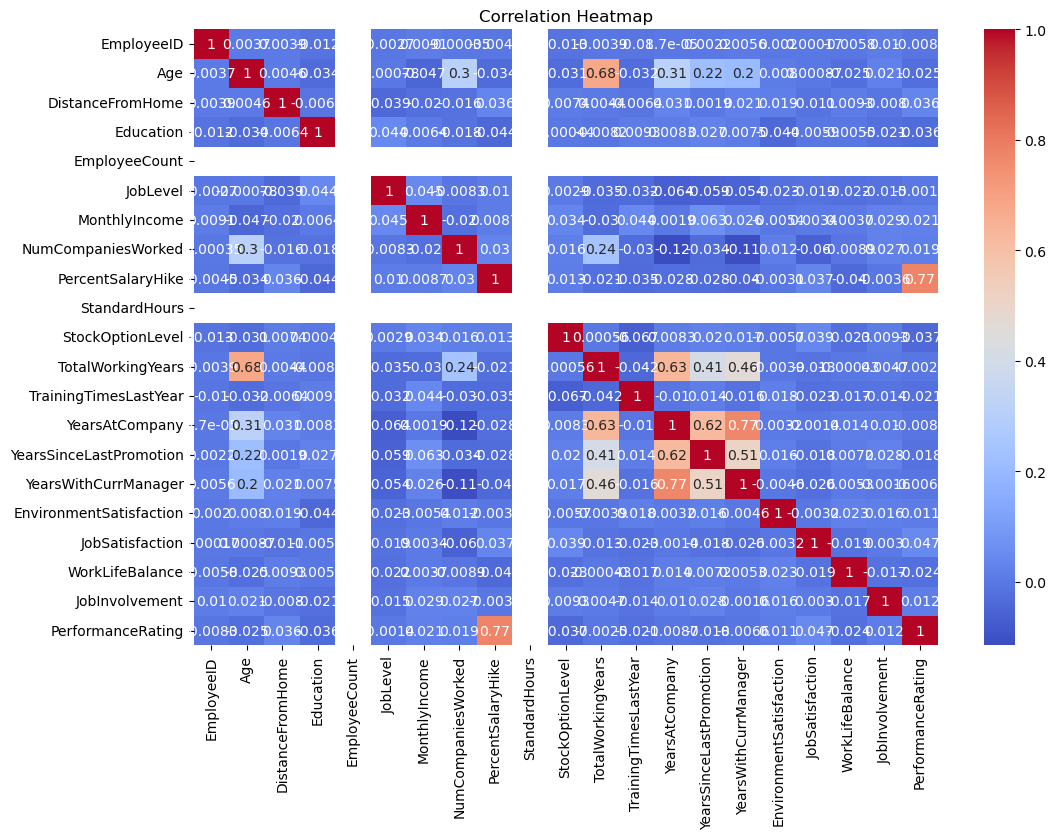

In [6]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [7]:
# Key Factors Influencing Attrition
# Convert categorical variables to numeric
data=pd.read_csv(r'C:\Users\pc\Downloads\Attrition data.csv')

In [8]:
data

,EmployeeID,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,1,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,...,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,2,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,Female,...,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,3,32,No,Travel_Frequently,Research & Development,17,4,Other,1,Male,...,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,4,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,Male,...,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,5,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,Male,...,9.0,2,6,0,4,4.0,1.0,3.0,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,4406,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,Female,...,10.0,5,3,0,2,4.0,1.0,3.0,3,3
4406,4407,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,Male,...,10.0,2,3,0,2,4.0,4.0,3.0,2,3
4407,4408,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,Male,...,5.0,4,4,1,2,1.0,3.0,3.0,3,4
4408,4409,42,No,Travel_Rarely,Sales,18,2,Medical,1,Male,...,10.0,2,9,7,8,4.0,1.0,3.0,2,3


In [9]:
X = data.drop('Attrition',axis=1)
y = data['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
# Ensure the 'Attrition' column is present
if 'Attrition' not in data.columns:
    raise KeyError("The 'Attrition' column is not found in the dataset")

# Data Cleaning
data.dropna(inplace=True)

# Convert 'Attrition' column to numeric (assuming 'Yes' = 1, 'No' = 0)
data['Attrition'] = data['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

# Identify categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns

# Convert categorical variables to numeric using pd.get_dummies()
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Split the data into training and testing sets
X = data.drop('Attrition', axis=1)
y = data['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Model evaluation
y_pred = model.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))



Accuracy: 0.9775193798449613
Confusion Matrix:
 [[1076    5]
 [  24  185]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1081
           1       0.97      0.89      0.93       209

    accuracy                           0.98      1290
   macro avg       0.98      0.94      0.96      1290
weighted avg       0.98      0.98      0.98      1290



Feature Importance:
 Age                                  0.079104
MonthlyIncome                        0.075500
TotalWorkingYears                    0.075389
YearsAtCompany                       0.057098
DistanceFromHome                     0.056803
PercentSalaryHike                    0.050964
YearsWithCurrManager                 0.042979
NumCompaniesWorked                   0.040158
EnvironmentSatisfaction              0.037003
JobSatisfaction                      0.035980
YearsSinceLastPromotion              0.034843
EmployeeID                           0.032481
TrainingTimesLastYear                0.032308
WorkLifeBalance                      0.029723
Education                            0.029483
JobInvolvement                       0.028358
MaritalStatus_Single                 0.027537
JobLevel                             0.027302
StockOptionLevel                     0.025752
BusinessTravel_Travel_Frequently     0.015757
JobRole_Sales Executive              0.014108
Gender_Male  

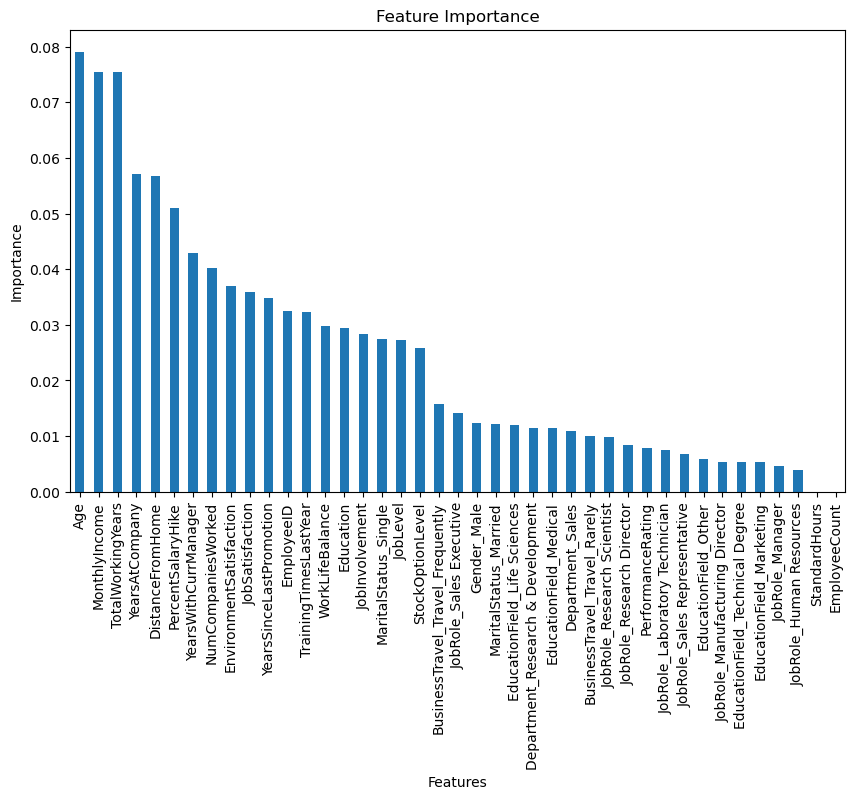

In [11]:
# Feature importance
feature_importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
print('Feature Importance:\n', feature_importance)

# Visualize feature importance
plt.figure(figsize=(10, 6))
feature_importance.plot(kind='bar')
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()